In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [5]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]

Creating a Train Test Split
Using koi_disposition for the y values

In [6]:
X = selected_features
y = df['koi_disposition']
print(X.shape, y.shape)

(6991, 40) (6991,)


In [7]:
# Using train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Train the Model

In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
training_score = clf.score(X_train, y_train)
testing_score = clf.score(X_test, y_test)

In [9]:
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 1.0
Testing Data Score: 0.8524027459954233


In [10]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
sorted(zip(clf.feature_importances_, selected_features), reverse=True)

[(0.19498480426684975, 'koi_fpflag_nt'),
 (0.1832237219933048, 'koi_fpflag_co'),
 (0.17331823962024664, 'koi_fpflag_ss'),
 (0.13595692965035922, 'koi_model_snr'),
 (0.030142025764467346, 'koi_fpflag_ec'),
 (0.02728243596927496, 'koi_impact'),
 (0.018679687805139546, 'dec'),
 (0.014182287233158718, 'koi_prad'),
 (0.012436914038241762, 'koi_srad_err1'),
 (0.011369610786635538, 'koi_time0bk'),
 (0.011091600861869048, 'ra'),
 (0.010947812138514198, 'koi_duration'),
 (0.01056761209749278, 'koi_time0bk_err2'),
 (0.010300474492776988, 'koi_steff_err1'),
 (0.009994091669180746, 'koi_insol_err1'),
 (0.009642431653847162, 'koi_period'),
 (0.009547792764407165, 'koi_steff_err2'),
 (0.0091626844737139, 'koi_impact_err1'),
 (0.009132589271445375, 'koi_slogg_err2'),
 (0.008583141796550479, 'koi_duration_err2'),
 (0.007741851748220975, 'koi_depth_err2'),
 (0.007522968347992196, 'koi_kepmag'),
 (0.007504773320833532, 'koi_prad_err1'),
 (0.007326971530681194, 'koi_period_err2'),
 (0.007212251485817303,

In [12]:
# Making predictions with the model
predictions = clf.predict(X_test)

In [14]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,CANDIDATE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1743,CANDIDATE,CANDIDATE
1744,CANDIDATE,CANDIDATE
1745,CONFIRMED,CONFIRMED
1746,CANDIDATE,CONFIRMED


In [15]:
results.head(10)

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,CANDIDATE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,FALSE POSITIVE,FALSE POSITIVE
5,CONFIRMED,CONFIRMED
6,CONFIRMED,CANDIDATE
7,CANDIDATE,CANDIDATE
8,CANDIDATE,CANDIDATE
9,FALSE POSITIVE,FALSE POSITIVE


In [16]:
results.tail(10)

,Prediction,Actual
1738,FALSE POSITIVE,FALSE POSITIVE
1739,CANDIDATE,CANDIDATE
1740,FALSE POSITIVE,FALSE POSITIVE
1741,FALSE POSITIVE,FALSE POSITIVE
1742,FALSE POSITIVE,FALSE POSITIVE
1743,CANDIDATE,CANDIDATE
1744,CANDIDATE,CANDIDATE
1745,CONFIRMED,CONFIRMED
1746,CANDIDATE,CONFIRMED
1747,CONFIRMED,CONFIRMED


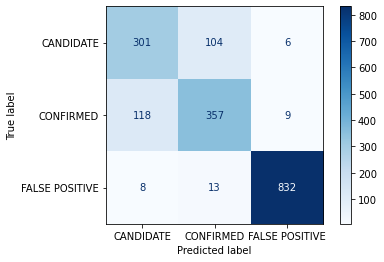

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap="Blues")
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.70      0.73      0.72       411
     CONFIRMED       0.75      0.74      0.75       484
FALSE POSITIVE       0.98      0.98      0.98       853

      accuracy                           0.85      1748
     macro avg       0.81      0.82      0.81      1748
  weighted avg       0.85      0.85      0.85      1748



In [20]:
# saving the model by updating "your_name" with Adebayo
# and "your_model" with your model variable
# if joblib fails to import, will try running the command to install in terminal/git-bash
import joblib
filename = 'Adebayo_DT.sav'
joblib.dump(clf, filename)

['Adebayo_DT.sav']